In [13]:
import dynamics_analysis as da
import matplotlib.pyplot as plt
from copy import deepcopy
import numpy as np

%load_ext autoreload
%autoreload 2 
plt.rcParams["figure.figsize"] = (4.5,3.5)
plt.rc('legend', fontsize = 10)
plt.rcParams["legend.framealpha"] = 1

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
path = '../../data_mac/data_3_04_2024/'

dyns={}
paramchar= "nl5_n2_2_E-0.10E-02_dtadd1.00_1.00_4_ar0.0_g0.004_gam0.005536_nm300_p0.5E-05_wq4.4712_wc7.415_bc2.400_4.461_7.421_12.600_bw0.550_mr0.00_0.80_0.00_wd7.421_ad0.0030_off1.00_0.30_anh-0.211_dt0.0100_errl0.1E-03_lsfe16_qb11_cv3.0_tmax500_QUTR2"
dyns['2 ang=0.3 1e-4'] = da.dynamics(nl=5, path=path, paramchar=paramchar)
paramchar= "nl5_n2_2_E-0.10E-02_dtadd1.00_1.00_4_ar0.0_g0.004_gam0.005536_nm300_p0.5E-05_wq4.4712_wc7.415_bc2.400_4.461_7.421_12.600_bw0.550_mr0.00_0.80_0.00_wd7.421_ad0.0030_off1.00_0.13_anh-0.211_dt0.0100_errl0.1E-03_lsfe16_qb11_cv3.0_tmax500_QUTR2"
dyns['2 ang=0.13 1e-4'] = da.dynamics(nl=5, path=path, paramchar=paramchar)
paramchar= "nl5_n2_2_E-0.10E-02_dtadd1.00_1.00_4_ar0.0_g0.004_gam0.005536_nm300_p0.5E-05_wq4.4712_wc7.415_bc2.400_4.461_7.421_12.600_bw0.550_mr0.00_0.80_0.00_wd7.421_ad0.0030_off1.00_0.30_anh-0.211_dt0.0100_errl0.1E-04_lsfe16_qb11_cv3.0_tmax500_QUTR2"
dyns['2 ang=0.3 1e-5'] = da.dynamics(nl=5, path=path, paramchar=paramchar)
paramchar= "nl5_n2_2_E-0.10E-02_dtadd1.00_1.00_4_ar0.0_g0.004_gam0.005536_nm300_p0.5E-05_wq4.4712_wc7.415_bc2.400_4.461_7.421_12.600_bw0.550_mr0.00_0.80_0.00_wd7.421_ad0.0030_off1.00_0.13_anh-0.211_dt0.0100_errl0.1E-04_lsfe16_qb11_cv3.0_tmax500_QUTR2"
dyns['2 ang=0.13 1e-5'] = da.dynamics(nl=5, path=path, paramchar=paramchar)

## CAVITY PHOTON NUMBER and ERROR versus time

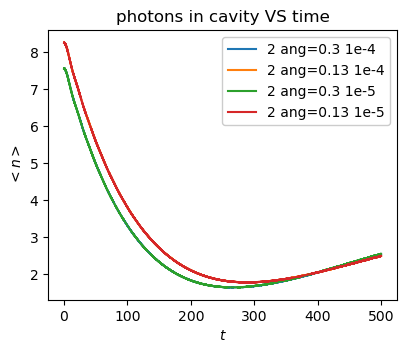

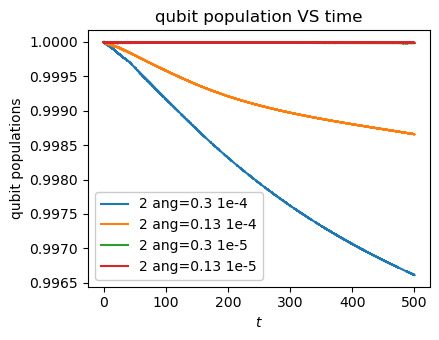

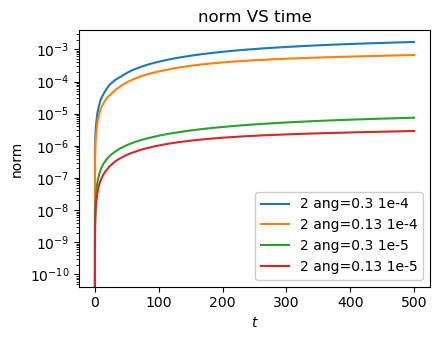

In [18]:
for key in dyns:
    plt.plot( dyns[key].times, dyns[key].nk[:,0], label=key  )
#plt.ylim(7,8)
#plt.xlim(225,250)
plt.ylabel( "$<n>$" )
plt.xlabel( "$t$" )
plt.title( "photons in cavity VS time"  )
plt.legend()
plt.show()

for key in dyns:
    plt.plot( dyns[key].times, dyns[key].pplt[:,1], label=key  )
plt.ylabel( "qubit populations" )
plt.xlabel( "$t$" )
plt.title( "qubit population VS time"  )
plt.legend()
plt.tight_layout()
plt.show()

for key in dyns:
    plt.plot( dyns[key].times, 1-dyns[key].norm, label=key  )
plt.ylabel( "norm" )
plt.yscale('log')
plt.xlabel( "$t$" )
plt.title( "norm VS time"  )
plt.legend()
plt.tight_layout()
plt.show()

## **Bath photon spectrum**

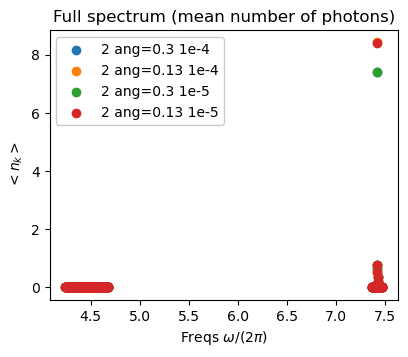

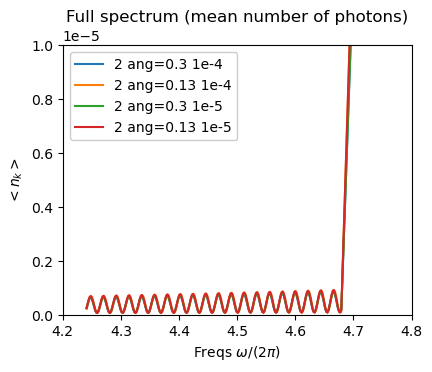

In [21]:
##for n in dyns:
for key in dyns:
    plt.scatter( dyns[key].wk/(2*np.pi), dyns[key].nk[-1,1:], label=key  )
plt.title( "Full spectrum (mean number of photons)"  )
plt.xlabel( "Freqs $\omega/(2\pi)$"  )
plt.ylabel( "$<n_k>$" )
plt.legend()
plt.show()

#for n in dyns:
for key in dyns:   
    plt.plot( dyns[key].wk/(2*np.pi), dyns[key].nk[-1,1:], label=key  )
plt.xlim(4.2,4.8)
plt.ylim(0,0.00001)
plt.title( "Full spectrum (mean number of photons)"  )
plt.xlabel( "Freqs $\omega/(2\pi)$"  )
plt.ylabel( "$<n_k>$" )
plt.legend()
plt.show()

# **Wigner function of the final state**

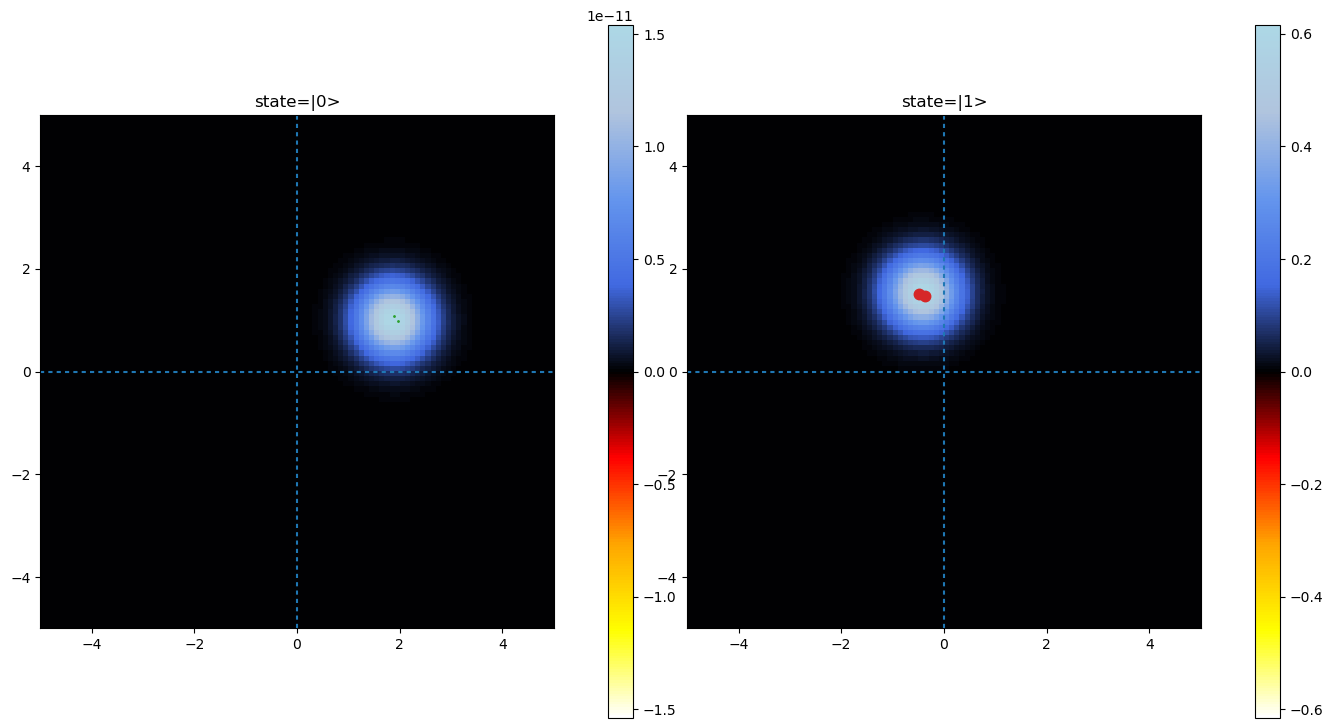

In [25]:
dyns['2 ang=0.3 1e-5'].final_state.plot_split_wigners(xmin=-5, add_cs_centers=True)

In [21]:
print( dyns['ncs=30 0.02'].log )

 ========== LOG FILE ============
 
 -- simulation parameter char:
 nl5_n2_30_E0.20E-01_dtadd2.00_2.00_4_ar0.0_g-0.107_gam0.005536_nm200_p0.5E-05_w
 q4.4712_wc7.415_bc2.400_4.461_7.419_12.600_bw0.366_mr0.00_0.80_0.00_wd7.419_ad0
 .0060_anh-0.211_dt0.0100_errl0.1E-03_lsfe14_qb2_cv0.0_tmax500_TRSM2            
                                                                
 
 -- parameters initialised
 -- arrays allocated
 -- trajectory allocated
 -- BARE state initialisation complete
  TIME  ||  DEL t   || err || sol || oth ||  su || ncs || SFE -- SFE            
                      
 ------ || -------- || --- || --- || --- || --- || --- || ----------            
                      
    0.0 ||        0 ||   0 ||   0 ||   0 ||   0 ||   2 ||  30 --   0            
                      
 -- CS ADDED: fr  2 to   3 at t=   6.55              
 -- CS ADDED: fr  3 to   4 at t=   8.55              
 -- CS ADDED: fr  4 to   5 at t=  11.54              
 -- CS ADDED: fr  5 to   6 at t=  24.